In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt


In [7]:
import mdtraj as md

# Load crystal structure
crystal_traj = md.load("2W9T.pdb")

# Load Alphafold prediction
alphafold_traj = md.load("relaxed_model_1_pred_0.pdb")

# Align structures
aligned_traj = alphafold_traj.superpose(crystal_traj, atom_indices=alphafold_traj.top.select("name CA"))

# Calculate RMSD for side-chains (all heavy atoms except alpha-carbons and backbone)
side_chain_indices = set(aligned_traj.top.select("all")) - set(aligned_traj.top.select("name CA or backbone"))
side_chain_indices = list(side_chain_indices)  # Convert set to list
rmsd_side_chain = md.rmsd(aligned_traj, crystal_traj, atom_indices=side_chain_indices)

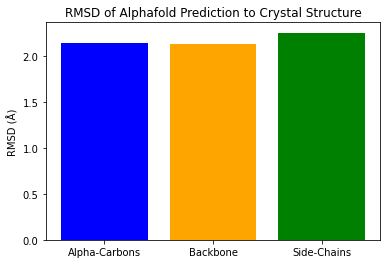

In [9]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Alpha-Carbons', 'Backbone', 'Side-Chains']
rmsd_values = [np.mean(rmsd_ca), np.mean(rmsd_backbone), np.mean(rmsd_side_chain)]
colors = ['blue', 'orange', 'green']  # Choose colors for each category

plt.bar(labels, rmsd_values, color=colors)
plt.ylabel('RMSD (Å)')
plt.title('RMSD of Alphafold Prediction to Crystal Structure')
plt.show()